In [1]:
import pandas as pd
import numpy as np
import sys, gc

In [13]:
df_tcgabiolinks = pd.read_csv("../TCGA_biolinks.csv", index_col=0).dropna(how="all", axis=1)
df_tcgabiolinks = df_tcgabiolinks[df_tcgabiolinks["cancer.type"]=="COAD"].set_index("pan.samplesID")
df_tcgabiolinks

,cancer.type,Subtype_mRNA,Subtype_DNAmeth,Subtype_protein,Subtype_miRNA,Subtype_CNA,Subtype_Integrative,Subtype_other,Subtype_Selected
pan.samplesID,,,,,,,,,
TCGA-3L-AA1B,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-4N-A93T,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-4T-AA8H,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-5M-AAT4,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-5M-AAT5,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
...,...,...,...,...,...,...,...,...,...
TCGA-QL-A97D,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-RU-A8FL,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN
TCGA-SS-A7HO,COAD,NaN,NaN,NaN,NaN,NaN,NaN,CIN,GI.CIN


In [103]:
df_files=pd.read_csv("files_tcga.dat", index_col=0)
df_files=df_files.reset_index().drop_duplicates("cases.0.submitter_id").set_index("cases.0.submitter_id")
df_files = df_files.reindex(index=df_tcgabiolinks.index, copy=False)
df_files = df_files.transpose().append(df_tcgabiolinks.transpose()).transpose()
df_files = df_files.reset_index().set_index("file_name").fillna("unknown")

bins = np.linspace(0,5,num=4)
cutted = pd.cut(df_files["cases.0.samples.0.longest_dimension"].replace("unknown", np.nan).dropna().astype(float),bins=bins, labels=bins[1:])
df_files["longest_dimension"]=df_files["cases.0.samples.0.longest_dimension"]
df_files["longest_dimension"][cutted.index]=cutted

In [104]:
df_files.to_csv("files.dat", index=True, header=True)

In [56]:
df = pd.read_csv("mainTable_all.csv",index_col=0)

In [58]:
df.columns[~df.columns.isin(df_files.index)]

Index(['6e0407fb-7b98-4cc8-a6f0-f6e7f5935eca.FPKM.txt.gz',
       'a8d7571b-7539-40ac-8be9-209aa54769d2.FPKM.txt.gz',
       'e5b468e1-f932-497d-8045-e75588701aac.FPKM.txt.gz',
       '59608767-595f-402a-9f7f-356dd6e99a51.FPKM.txt.gz',
       '938e4a22-7ed8-4b09-aa65-0cd737beee31.FPKM.txt.gz',
       '7b2cd944-1cd6-4107-8aa6-11913ee32257.FPKM.txt.gz',
       'f006e10f-a564-425c-8d92-0b8c3d5c038f.FPKM.txt.gz',
       '43b292be-5d63-4523-a43f-666d20039208.FPKM.txt.gz',
       'bf4c7278-d90c-497e-97af-cc9c68ca1525.FPKM.txt.gz',
       'b2d38886-f7a9-439e-86ac-d99d45447cc1.FPKM.txt.gz',
       ...
       'c3f9ba64-6946-45d4-984d-b33ef2589603.FPKM.txt.gz',
       'd60b1d68-c859-43af-b9bd-1a7dae06c804.FPKM.txt.gz',
       '058cd2dd-6bea-4188-8bb2-3314723c0762.FPKM.txt.gz',
       '6f699ea3-1d77-493e-9e9b-a3e2abbd2873.FPKM.txt.gz',
       'd67325ce-cd01-45b8-b816-74fc73acd54a.FPKM.txt.gz',
       '09977485-e1d1-41b1-b2b8-7ab0ad6df0a0.FPKM.txt.gz',
       '11d08d8f-beea-4b57-a9cd-2f957a391360.

In [59]:
df_files[~df_files.index.isin(df.columns)]

,pan.samplesID,cases.0.diagnoses.0.morphology,cases.0.diagnoses.0.primary_diagnosis,cases.0.diagnoses.0.tissue_or_organ_of_origin,cases.0.diagnoses.0.tumor_grade,cases.0.diagnoses.0.tumor_stage,cases.0.project.disease_type,cases.0.project.primary_site,cases.0.samples.0.longest_dimension,cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id,cancer.type,Subtype_mRNA,Subtype_DNAmeth,Subtype_protein,Subtype_miRNA,Subtype_CNA,Subtype_Integrative,Subtype_other,Subtype_Selected
file_name,,,,,,,,,,,,,,,,,,,
NaN,TCGA-AZ-4681,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,COAD,unknown,unknown,unknown,unknown,unknown,unknown,CIN,GI.CIN


In [60]:
df_files["Subtype_Selected"].unique()

array(['GI.CIN', 'GI.MSI', 'GI.GS', 'GI.HM-SNV'], dtype=object)

In [62]:
df = df.reindex(columns=df.columns[df.columns.isin(df_files.index)])
df.to_csv("mainTable.csv", index=True, header=True)
df_files.fillna("unknown").to_csv("files.dat", index=True)

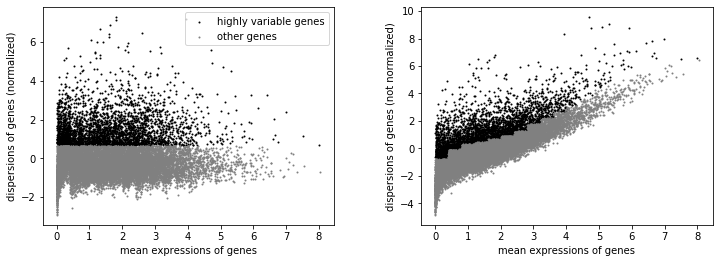

In [64]:
import scanpy as sc
adata = sc.AnnData(X=df.transpose(), obs=df_files.reindex(index=df.columns))
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pl.highly_variable_genes(adata)
hvg = adata.var[adata.var["highly_variable"]==True].index

In [65]:
df.reindex(index=hvg).to_csv("mainTable.csv", index=True, header=True)

In [66]:
sys.path.append("/home/jovyan/work/phd/hsbm-occam/")
from sbmtm import sbmtm

ModuleNotFoundError: No module named 'graph_tool'

In [24]:
hsbm = sbmtm()

NameError: name 'sbmtm' is not defined

In [112]:
hsbm.make_graph_from_BoW_df(df.reindex(index=hvg))

In [113]:
hsbm.save_graph("graph.xml.gz")

In [114]:
del hsbm
gc.collect()

4276

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15659 entries, ENSG00000000419 to ENSG00000273489
Columns: 227 entries, 535e80df-ea81-4f5d-8f2e-e74ca97e9b01.htseq.counts.gz to 07ec290d-c41b-42eb-8cb2-07504451f732.htseq.counts.gz
dtypes: int64(227)
memory usage: 27.2+ MB
